# MOVIE ANALYSIS

## An analysis of movies collected from IMDB

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='IMDb movies.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [2]:
df_movie = df_data_1[['title', 'year', 'duration', 'avg_vote', 'votes', 'metascore']]

In [3]:
df_movie.head()

,title,year,duration,avg_vote,votes,metascore
0,The Story of the Kelly Gang,1906,70,6.1,537,NaN
1,Den sorte drøm,1911,53,5.9,171,NaN
2,Cleopatra,1912,100,5.2,420,NaN
3,L'Inferno,1911,68,7.0,2019,NaN
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,60,5.7,438,NaN


In [4]:
df_movie.shape

(81273, 6)

In [5]:
df_movie_1 = df_movie.dropna()

In [6]:
df_movie_11 = df_movie_1.reset_index()
df_movie_11.head()

,index,title,year,duration,avg_vote,votes,metascore
0,73,Intolerance: Love's Struggle Throughout the Ages,1916,163,7.8,13116,93.0
1,488,Metropolis,1927,153,8.3,148396,98.0
2,546,The Jazz Singer,1927,88,6.5,8372,66.0
3,604,The Circus,1928,72,8.2,23629,90.0
4,758,Piccadilly,1929,92,7.2,1247,89.0


In [7]:
df_movie_11.corr()

,index,year,duration,avg_vote,votes,metascore
index,1.000000,0.909371,-0.088253,-0.216076,-0.106414,-0.075492
year,0.909371,1.000000,-0.087260,-0.254182,-0.049646,-0.176244
duration,-0.088253,-0.087260,1.000000,0.344553,0.255000,0.217760
avg_vote,-0.216076,-0.254182,0.344553,1.000000,0.347775,0.692214
votes,-0.106414,-0.049646,0.255000,0.347775,1.000000,0.196126
metascore,-0.075492,-0.176244,0.217760,0.692214,0.196126,1.000000


In [8]:
df_movie_11.shape

(12722, 7)

## DATA ANALYSIS AND VISUALIZATION

In [9]:
## Importing Data Visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [10]:
from sklearn import linear_model

In [11]:
## Creating a new dataframe based on year and average votes
df_movie1 = df_movie_11[['year', 'avg_vote']]
## Grouping year based on votes
df_movie1 = df_movie1.groupby(['year'],as_index=False).mean()
df_movie1.head()

,year,avg_vote
0,1916,7.80
1,1927,7.40
2,1928,8.20
3,1929,7.20
4,1930,7.85


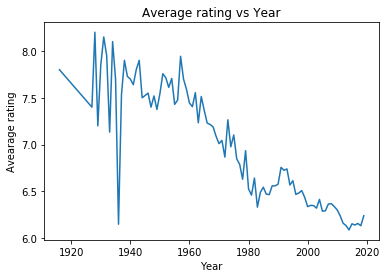

In [12]:
## A line plot showing Average rating vs Year
sns.lineplot(x="year", y="avg_vote", data=df_movie1)
plt.xlabel('Year')
plt.ylabel('Avearage rating')
plt.title('Average rating vs Year')
plt.show()

In [13]:
## Creating a new dataframe based on year and total votes
df_movie2 = df_movie_11[['year', 'votes']]
## Grouping year based on votes
df_movie2 = df_movie2.groupby(['year'],as_index=False).sum()
df_movie2.head()

,year,votes
0,1916,13116
1,1927,156768
2,1928,23629
3,1929,1247
4,1930,67025


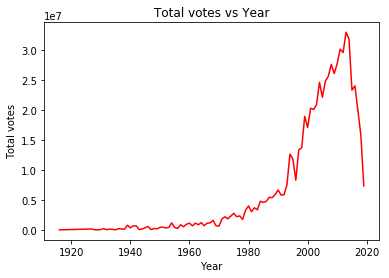

In [14]:
## A line plot showing Total Number of Votes vs Year
sns.lineplot(x="year", y="votes", data=df_movie2, color = "red")
plt.xlabel('Year')
plt.ylabel('Total votes')
plt.title('Total votes vs Year')
plt.show()

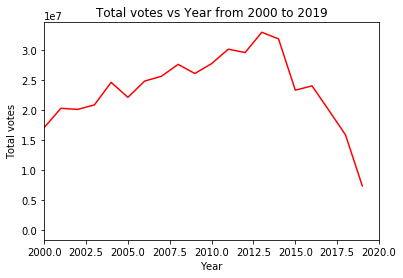

In [15]:
## A line plot showing Total Number of Votes vs Year
sns.lineplot(x="year", y="votes", data=df_movie2, color = "red")
plt.xlabel('Year')
plt.ylabel('Total votes')
plt.xlim(2000,2020)
plt.title('Total votes vs Year from 2000 to 2019')
plt.show()

In [16]:
## Creating a new dataframe based on year and average metascore
df_movie3 = df_movie_11[['year', 'metascore']]
## Grouping year based on votes
df_movie3 = df_movie3.groupby(['year'],as_index=False).mean()
df_movie3.head()

,year,metascore
0,1916,93.0
1,1927,82.0
2,1928,90.0
3,1929,89.0
4,1930,89.5


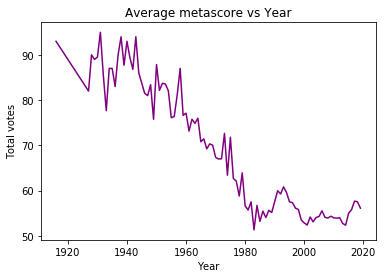

In [17]:
## A line plot showing Average metascore vs Year
sns.lineplot(x="year", y="metascore", data=df_movie3, color = "purple")
plt.xlabel('Year')
plt.ylabel('Total votes')
plt.title('Average metascore vs Year')
plt.show()

In [18]:
df_movie4 = df_movie_11.sort_values(by = "avg_vote", ascending = True).reset_index()
df_movie41 = df_movie4.tail(20)
df_movie41.drop("index", axis = 1, inplace = True)
df_movie41.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,level_0,title,year,duration,avg_vote,votes,metascore
12702,791,Star Wars: Episode V - The Empire Strikes Back,1980,124,8.7,1078687,82.0
12703,6814,Bull,2019,105,8.7,1238,63.0
12704,555,One Flew Over the Cuckoo's Nest,1975,133,8.7,852750,83.0
12705,2737,The Matrix,1999,136,8.7,1554261,73.0
12706,3008,The Lord of the Rings: The Two Towers,2002,179,8.7,1387154,87.0


In [19]:
df_movies42 = df_movie41[['title', 'avg_vote']]
df_movies43 = df_movies42.sort_values(by = "avg_vote", ascending = False)
df_movies43

,title,avg_vote
12721,The Shawshank Redemption,9.3
12720,Human Capital,9.2
12719,The Godfather,9.2
12718,The Dark Knight,9.0
12717,The Godfather: Part II,9.0
12713,Pulp Fiction,8.9
12716,Schindler's List,8.9
12715,12 Angry Men,8.9
12714,The Lord of the Rings: The Return of the King,8.9
12712,Inception,8.8


In [20]:
ind = df_movies42.set_index('title', inplace= True)

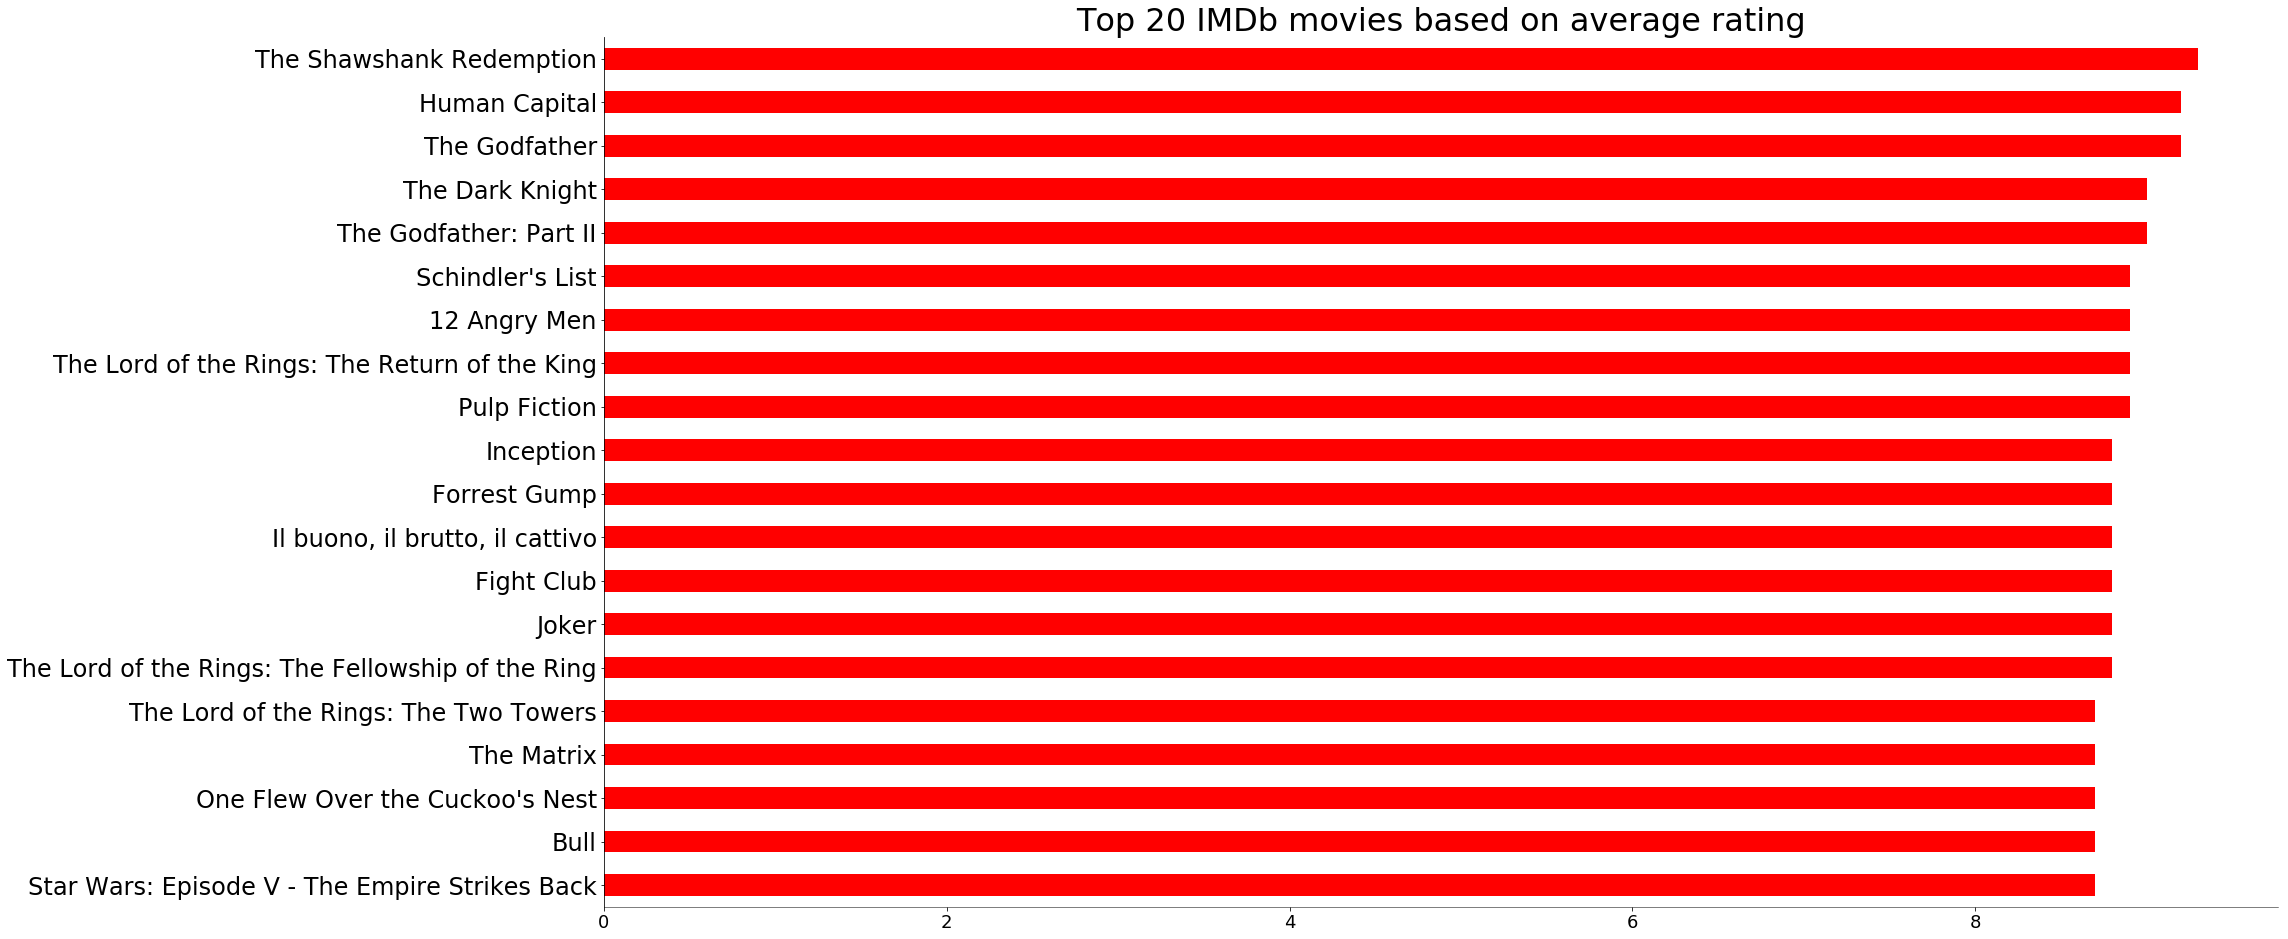

In [21]:
## A horizontal bar graph showing the top rated movies on IMDb
bar = df_movies42.plot(kind='barh',figsize=(30, 16), color = "red", legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind,fontsize = 18)
plt.ylabel("")
plt.title("Top 20 IMDb movies based on average rating", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

In [22]:
df_movie5 = df_movie_11.sort_values(by = "votes", ascending = True).reset_index()
df_movie51 = df_movie5.tail(20)
df_movie51.drop("index", axis = 1, inplace = True)
df_movie51.head()

,level_0,title,year,duration,avg_vote,votes,metascore
12702,4783,Inglourious Basterds,2009,153,8.3,1162209,69.0
12703,1803,The Silence of the Lambs,1991,118,8.6,1169794,85.0
12704,6533,The Avengers,2012,143,8.0,1206904,69.0
12705,4928,Batman Begins,2005,140,8.2,1225020,70.0
12706,3044,Gladiator,2000,155,8.5,1246752,67.0


In [23]:
df_movies52 = df_movie51[['title', 'votes']]
ind2 = df_movies52.set_index('title', inplace= True)
df_movies53 = df_movies52.sort_values(by = "votes", ascending = False)
df_movies53

,votes
title,
The Shawshank Redemption,2159628
The Dark Knight,2134569
Inception,1892929
Fight Club,1725365
Pulp Fiction,1695085
Forrest Gump,1662528
The Matrix,1554261
The Lord of the Rings: The Fellowship of the Ring,1548863
The Lord of the Rings: The Return of the King,1533574


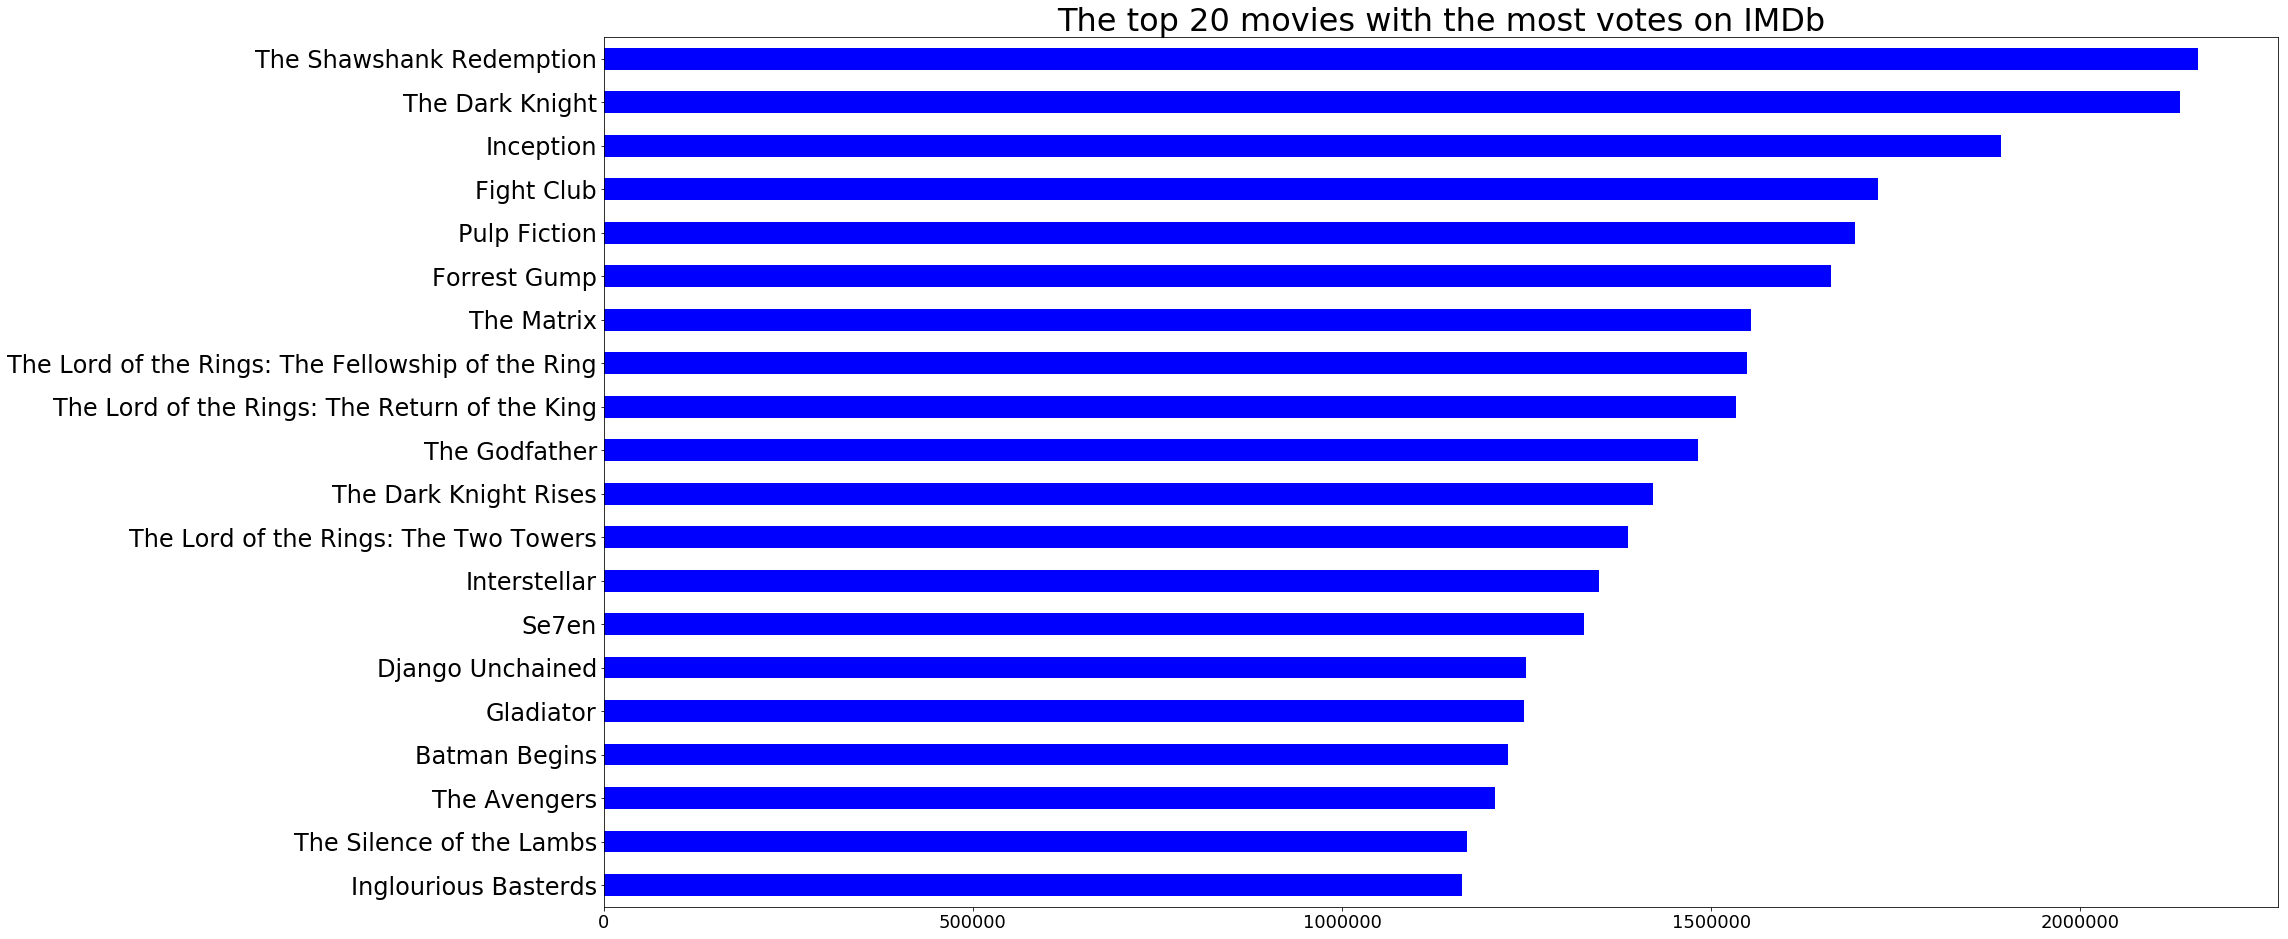

In [24]:
## A horizontal bar graph showing the movies with the most votes on IMDb
bar2 = df_movies52.plot(kind='barh',figsize=(30, 16), color = "blue", legend = None)
bar2
plt.yticks(fontsize = 24)
plt.xticks(ind2,fontsize = 18)
plt.ylabel("")
plt.title("The top 20 movies with the most votes on IMDb", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

In [25]:
line = linear_model.LinearRegression()

In [26]:
df_ratings = df_movie_11.loc[:, "avg_vote"].values.reshape(-1, 1) 
df_votes = df_movie_11.loc[:, "votes"].values.reshape(-1, 1)

In [27]:
line.fit(df_ratings,df_votes)
pred = line.predict(df_ratings)

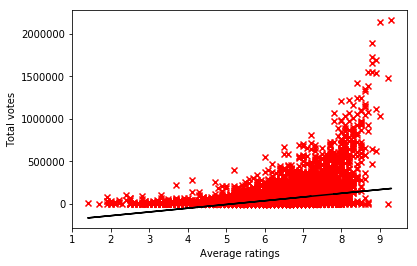

In [28]:
## A scatter plot comparing average ratings to total votes of IMDb movies 
plt.scatter('avg_vote','votes', data = df_movie_11, marker = 'x', color = 'red')
plt.ylabel("Total votes")
plt.xlabel("Average ratings")
plt.plot(df_ratings, pred, color = 'black')
plt.show()